In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/saba.ali/Desktop/Saba/hospitaldata.csv')

In [3]:
#Question 1

col = data.columns
col = [c.replace(".", "") for c in col]
data.columns = col

In [4]:
#Question 2

days = []
for i in data.Date:
    days.append(i.split(",")[0])

count = {}
for i in days:
    if i in count.keys():
        count[i] +=1
    else:
        count[i] = 1
count

{'Friday': 26,
 'Monday': 51,
 'Saturday': 20,
 'Sunday': 7,
 'Thursday': 33,
 'Tuesday': 42,
 'Wednesday': 43}

In [5]:
#Question 3

data.Age = pd.to_numeric(data.Age,errors='coerce')
data.Age = data.Age.fillna(0)
print(round(data.Age.mean(),0))

28.0


In [6]:
#Question 4

child = 0
for i in data.Age:
    if i >=1 and i <=12:
        child +=1
child

23

In [7]:
#Question 5

Male=data[data.Sex=='M']
print("Male: " + Male['Procedure'].value_counts().index.tolist()[0])

Female=data[data.Sex=='F']
print("Female: " + Female['Procedure'].value_counts().index.tolist()[0])

Male: Consultation
Female: Consultation


In [8]:
#Question 6

data1 = [data.ConsultingDoctor,data.TotalCharges]
data1 = pd.DataFrame(data1)
data1 = data1.transpose()
data1['TotalCharges']=pd.to_numeric(data1['TotalCharges'],errors='coerce')
data1.groupby(data1.ConsultingDoctor).sum()

,TotalCharges
ConsultingDoctor,
Brig Asif,2800.0
Brig Farrukh,3750.0
Col Ulfat Ellahi,1000.0
Dr Alaf Khan,513050.0
Dr Ali,26100.0
Dr Ammad,1400.0
Dr Ammara,1500.0
Dr Fakiha,22600.0
Dr Irfan,11000.0


In [9]:
#Question 7

data2 = [data.Procedure,data.TotalCharges]
data2 = pd.DataFrame(data2)
data2 = data2.transpose()
data2['TotalCharges']=pd.to_numeric(data2['TotalCharges'],errors='coerce')
data2.groupby(data2.Procedure).sum()

,TotalCharges
Procedure,
22 Unit Bridge,69500.0
4 Unit Bridge,11000.0
8 Unit Bridge+2 R.C.T,30000.0
BSR,50.0
C Section,65000.0
Cancelled,NaN
Consultation,83950.0
Consultation + X Ray,3000.0
Consultation + Dressing,5000.0


In [10]:
#Question 8

a=pd.to_datetime(data["Time"],errors='coerce')
print((a.dt.hour.value_counts()).sort_values())

9.0      2
23.0     2
22.0     4
21.0     5
10.0     6
20.0     8
11.0    10
19.0    14
16.0    15
17.0    16
15.0    20
14.0    20
12.0    20
18.0    23
13.0    29
Name: Time, dtype: int64


In [11]:
#Question 9

d = pd.to_datetime(data["Time"],errors='coerce')
daytime = []
for i in range(len(data.Time)):
    if d.dt.hour[i] >= 6.0 and d.dt.hour[i] <= 12.0:
        daytime.insert(i,"Morning")
    elif d.dt.hour[i] > 12.0 and d.dt.hour[i] <= 16.0:
        daytime.insert(i,"Afternoon");
    elif d.dt.hour[i] > 16.0 and d.dt.hour[i] <= 19.0:
        daytime.insert(i,"Evening");
    elif d.dt.hour[i] > 19.0:
        daytime.insert(i,"Night");
    else:
        daytime.insert(i,"NaT")
data.daytime = daytime
data.daytime

['Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Evening',
 'Evening',
 'Evening',
 'Afternoon',
 'Afternoon',
 'Evening',
 'Night',
 'Morning',
 'Night',
 'Night',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'NaT',
 'Night',
 'NaT',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Evening',
 'Evening',
 'Afternoon',
 'Evening',
 'NaT',
 'NaT',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Night',
 'Afternoon',
 'Evening',
 'Night',
 'NaT',
 'Afternoon',
 'Evening',
 'Evening',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Evening',
 'Night',
 'Morning',
 'Afternoon',
 'Evening',
 'NaT',
 'Morning',
 'NaT',
 'NaT',
 'NaT',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'NaT',
 'NaT',
 'Morning',
 '

In [12]:
#Question 10

count_visits = data.id.value_counts()

count_visits = count_visits[count_visits>1]
print(len(count_visits))

37


In [13]:
#Question 11

print (count_visits)

1      12
46      5
122     5
140     4
94      4
17      4
45      3
101     3
63      3
132     3
114     3
109     3
107     3
145     3
20      2
97      2
59      2
88      2
96      2
112     2
116     2
118     2
25      2
80      2
120     2
40      2
100     2
64      2
4       2
133     2
12      2
13      2
150     2
149     2
151     2
130     2
153     2
Name: id, dtype: int64


In [14]:
#Question 12

patient = data.groupby(["id","Procedure"]).size()
patient = patient[patient>1]
patient

id   Procedure                     
1    Pharmacy                          10
12   22 Unit Bridge                     2
13   Consultation                       2
17   Consultation                       2
     RCT (4 teeth) Bridge (9 teeth)     2
20   Consultation                       2
25   Consultation                       2
45   R.P.D + Crown                      2
46   Dressing                           4
63   Consultation                       2
80   Consultation                       2
94   Injection                          3
97   Consultation                       2
101  C Section                          2
109  R.C.T                              2
112  Operation                          2
114  Consultation                       3
116  X Ray                              2
122  Injection                          5
130  Consultation                       2
140  4 Unit Bridge                      2
145  Crown                              3
151  R.C.T+Scalling+Crown               

In [15]:
#Question 13

print("Male median: ")
print(data.Age[data.Sex == 'M'].median())
print("Female median: ")
print(data.Age[data.Sex == 'F'].median())

Male median: 
27.0
Female median: 
30.0


In [16]:
#Question 14

data.replace(to_replace = data.AmountBalance.unique()[0], value=np.nan, inplace=True)
data.AmountBalance=data.AmountBalance.map(lambda x: str(x).replace(',',''))
data.AmountBalance = data.AmountBalance.astype(float)
print(data.AmountBalance.sum())

NameError: name 'np' is not defined

In [17]:
#Question 15

data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')
data.TotalCharges[data.Procedure == "Consultation"].sum()

83950.0

In [18]:
#Question 16

data.corr().loc[['Age'],['TotalCharges']]

,TotalCharges
Age,0.056932


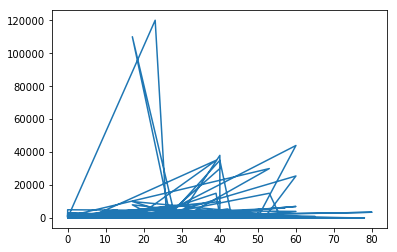

In [19]:
plt.plot(data.Age,data.TotalCharges)
plt.show()

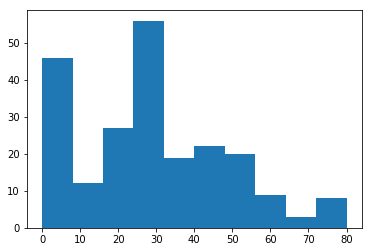

In [20]:
#Question 17

plt.hist(data.Age)
plt.show()

In [21]:
#Question 18

data.TotalCharges[(data.Procedure == "X Ray") | (data.Procedure == "Scalling")].sum()

22300.0

In [22]:
data.to_csv('CleanData.csv')